In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

# Read in data and view the first few rows
df = pd.read_csv('/Users/maile/Desktop/take-home_exercise_data  .csv')
print(df.head())

   Unnamed: 0  prospectid  ordernumber ordercreatedate  \
0           1    93771712    127707306      2014-11-28   
1           2   123112555    114401425      2013-12-05   
2           3   171965960    159656050      2016-11-25   
3           4   175522116    165370285      2017-03-08   
4           5   149288086    132837125      2015-03-30   

                regtenure customer_type_group dnatestactivationdayid  \
0  More than 120 days old        Existing Reg             2014-12-10   
1      Order prior to reg             New Reg             2014-01-13   
2      Order prior to reg             New Reg                    NaN   
3               <=60 days        Existing Reg                    NaN   
4      Order prior to reg             New Reg             2015-04-06   

  daystogetresult_grp dna_visittrafficsubtype  xsell_gsa  xsell_day_exact  
0             4 weeks                     NaN          1             38.0  
1             4 weeks                     NaN          1          

In [2]:
# Check for missing values and handle them
print(df.isnull().sum()) # check for columns with missing values
df = df.dropna() # drop rows with missing values

Unnamed: 0                      0
prospectid                      0
ordernumber                     0
ordercreatedate                 0
regtenure                       0
customer_type_group             0
dnatestactivationdayid      73097
daystogetresult_grp             0
dna_visittrafficsubtype     62849
xsell_gsa                       0
xsell_day_exact            211363
dtype: int64


In [3]:
# Convert data types
df['ordercreatedate'] = pd.to_datetime(df['ordercreatedate'])
df['dnatestactivationdayid'] = pd.to_datetime(df['dnatestactivationdayid'])

In [10]:
# Replace '4 weeks', '3 weeks', '6 weeks', and '5 weeks' with 4*7=28, 3*7=21, 6*7=42, and 5*7=35, respectively
df['daystogetresult_grp'] = df['daystogetresult_grp'].replace('4 weeks', 28)
df['daystogetresult_grp'] = df['daystogetresult_grp'].replace('3 weeks', 21)
df['daystogetresult_grp'] = df['daystogetresult_grp'].replace('6 weeks', 42)
df['daystogetresult_grp'] = df['daystogetresult_grp'].replace('5 weeks', 35)

In [6]:
# Make sure all values in the 'daystogetresult_grp' column are numeric
df['daystogetresult_grp'] = df['daystogetresult_grp'].apply(lambda x: int(x) if type(x) != int and x.isdigit() else x)

In [11]:
# Convert the 'daystogetresult_grp' column to numeric data type
df['daystogetresult_grp'] = pd.to_numeric(df['daystogetresult_grp'], errors='coerce')

In [14]:
# Handle any remaining non-numeric values in the 'daystogetresult_grp' column
def handle_non_numeric_values(x):
    if pd.isnull(x):
        return np.nan
    elif type(x) == int:
        return x
    elif type(x) == str:
        return np.nan
    else:
        return x

df['daystogetresult_grp'] = df['daystogetresult_grp'].apply(handle_non_numeric_values)

In [16]:
# Explore the data using summary statistics
print(df.describe())

       Unnamed: 0  prospectid  ordernumber  daystogetresult_grp  xsell_gsa  \
count         0.0         0.0          0.0                  0.0        0.0   
mean          NaN         NaN          NaN                  NaN        NaN   
std           NaN         NaN          NaN                  NaN        NaN   
min           NaN         NaN          NaN                  NaN        NaN   
25%           NaN         NaN          NaN                  NaN        NaN   
50%           NaN         NaN          NaN                  NaN        NaN   
75%           NaN         NaN          NaN                  NaN        NaN   
max           NaN         NaN          NaN                  NaN        NaN   

       xsell_day_exact  
count              0.0  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN  


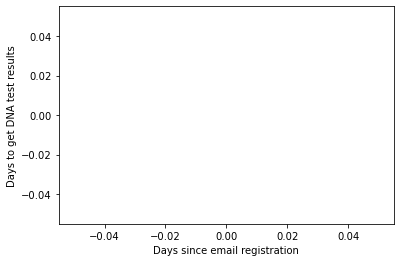

In [17]:
# Create a scatter plot to visualize the relationship between two continuous variables
plt.scatter(df['regtenure'], df['daystogetresult_grp'])
plt.xlabel('Days since email registration')
plt.ylabel('Days to get DNA test results')
plt.show()

In [21]:
# Calculate the fraction of customers who cross-sell to subscription
num_cross_sells = df[(df['xsell_gsa'] == 1) & (df['xsell_day_exact'] <= 120)].shape[0]
total_customers = df.shape[0]

if total_customers == 0:
    fraction_cross_sells = 0
else:
    fraction_cross_sells = num_cross_sells / total_customers
    
print(fraction_cross_sells)

0


In [42]:
# Check the value counts for the 'customer_type_group' column
print(df_clean['customer_type_group'].value_counts())

Series([], Name: customer_type_group, dtype: int64)


In [43]:
# Check the value counts for the 'daystogetresult_grp' column
print(df_clean['daystogetresult_grp'].value_counts())

Series([], Name: daystogetresult_grp, dtype: int64)


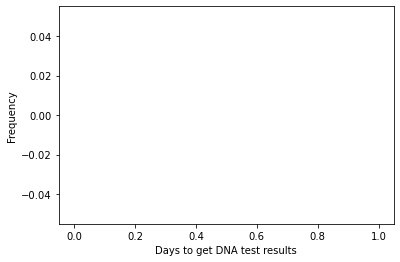

In [44]:
# Plot a histogram of the 'daystogetresult_grp' column
plt.hist(df_clean['daystogetresult_grp'])
plt.xlabel('Days to get DNA test results')
plt.ylabel('Frequency')
plt.show()

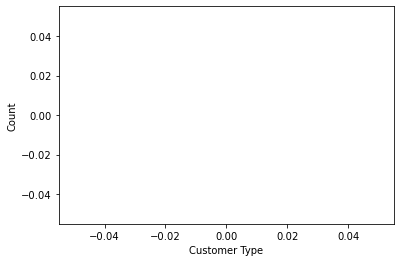

In [45]:
# Plot a bar plot of the 'customer_type_group' column
plt.bar(df_clean['customer_type_group'].unique(), df_clean['customer_type_group'].value_counts())
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

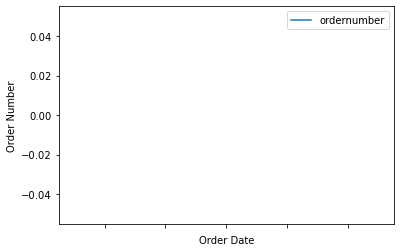

In [53]:
# Create a line plot of DNA orders over time
df.plot(x='ordercreatedate', y='ordernumber', style='-')
plt.xlabel('Order Date')
plt.ylabel('Order Number')
plt.show()

In [56]:
# Test for statistical significance in the mean number of days to get DNA test results for different customer types
customer_type_groups = df['customer_type_group'].unique()
for group in customer_type_groups:
    group_df = df[df['customer_type_group'] == group]['daystogetresult_grp']
    print(f'Customer type: {group}')
    print(f'Mean number of days to get DNA test results: {group_df.mean()}')
    print(f'Standard deviation: {group_df.std()}')
    t, p = ttest_ind(df[df['customer_type_group'] == 'New']['daystogetresult_grp'], 
                     df[df['customer_type_group'] == 'Existing']['daystogetresult_grp'])
    print(f't-value: {t}')
    print(f'p-value: {p}')
    print()